### Understanding Feedfoward Neural Network (FNN) model

Feedfoward Neural Network (FNN) is a simple kind of Artificial Neural Network (ANN).

An FNN model consists of three layers: an input layer, a few hidden layers and an output layer. 

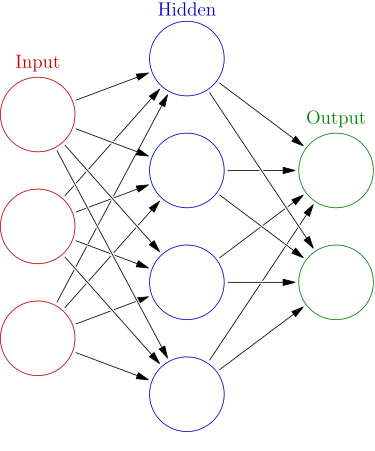

The model is called feedforward model because data only flows in one direction. 



## Steps in FNN

First, we split our dataset into training and testing sets. It is often good to dedicate 70% of data for training and 30% percent for testing. 

### Training the model on the training set. 

#### First iteration or `epoch`

The input layer has 8 nodes because our imput consists of 8 features.

Imagine that all of the inputs across all features are stacked in one column.

Take each input value, x, multiply by a randomly assigned weight, w, then take the weighted sum. Next, the model passes the weighted sum to the `activation function`. The result is passed as input to the next layer. 

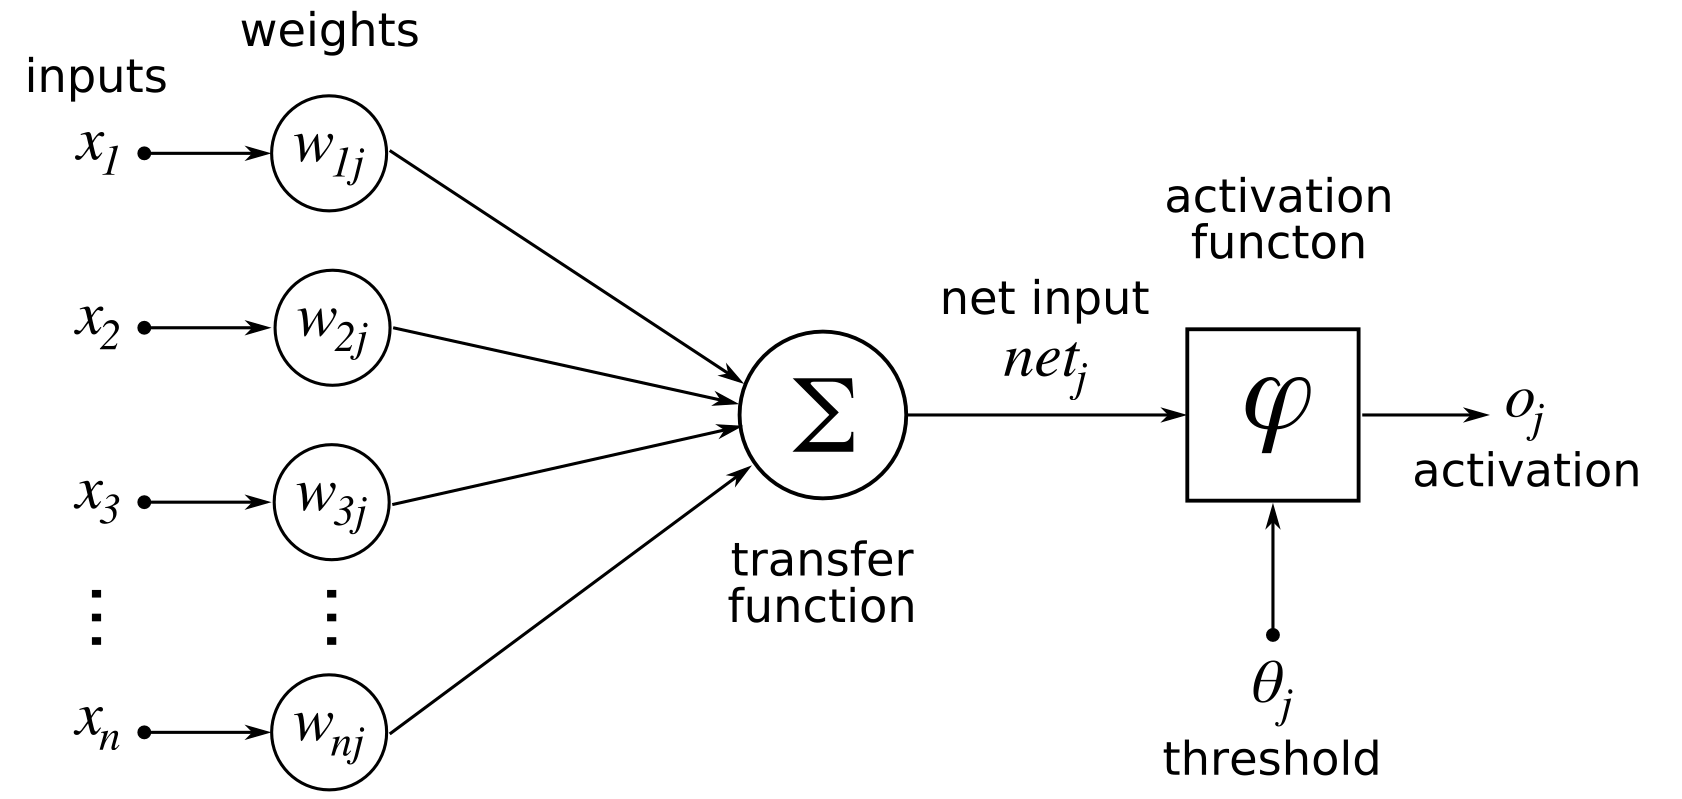

The model repeats the same process, moving from one layer to the next, until it reaches the output layer. It then compares the predicted output of the model to the actual output in our training dataset, and calculate the error using an `loss function`. 

#### More iterations or `epochs`

The model adjusts the weights at each layer, with an aim of minimzing the error using methods like gradient decent, and iterates the above process over and over for a specified number of times. 


### Advantages of FNN

Less complex, easy to design & maintain

Fast and speedy compared to more complicated models

Highly responsive to noisy data

### Disadvantages of FNN

Unsuitable for deep learning compared to other models

### Package installation

In [1]:
# packages installation
# !pip install keras
# !pip install tensorflow

# for interactive presentations 
# !pip install ipywidgets
# !pip install plotly

### Importing libraries and functions

In [2]:
import math
import random

# pandas for dataframe
import pandas as pd 
from sklearn import preprocessing

# for neural network
from keras import Sequential
from keras.layers import Dense

# for plotting graphs
import matplotlib.pyplot as plt

# import numpy
# from ipywidgets import interact, interactive, fixed, interact_manual

### Importing dataset

There are 9 features in total. The first 8 features will be our independent variable. The last feature, diabetic_risk, will be the outcome. 

This is a 1-dimentional binary classification problem because we are trying to predict a single dimension, biabetic_risk, and its values or either 0 or 1. It is a classification problem because we are classifying people into two groups, those at risk and those not at risk. 


In [ ]:
# import dataset
df_db = pd.read_csv("diabolic.csv")
# df_db.head(8)

### Splitting the dataset by 70-30

In [4]:
# Split the data into training and testing sets by 70-30.

length_db = len(df_db)
n_test = int(math.ceil(length_db * 0.3))
random.seed(1)
test_ixs = random.sample(list(range(length_db)), n_test)
train_ixs = [i for i in range(length_db) if i not in test_ixs]

train_db = df_db.iloc[train_ixs, :]
test_db = df_db.iloc[test_ixs, :]

print(len(train_db))
print(len(test_db))

537
231


### Chossing independent and dependent variables

In [5]:
# Extract the features we need. 
# The first 8 columns are independent variables
x_train_db = train_db.iloc[:,0:8]
x_test_db = test_db.iloc[:,0:8]

# The last column "diabetic" is the dependent variable.
y_train_db = train_db["diabetic_risk"]
y_test_db = test_db["diabetic_risk"]

# print(x_train_db.head())

### Normalize the data

Remember to perform normalization after splitting the data into training and testing sets. 

We use `sklearn.preprocessing.StandardScaler()` to normalize each column, using means and standard deviation. Normalized results are centered around 0. 

There is also `sklearn.preprocessing.Normalization()` which normalizes each row (instead of column) using a different method.

In [6]:
# normalize or standarize the data
# remember to perform this step after splitting training and testing sets. 
sc = preprocessing.StandardScaler()

# We are taking the mean and standard deviation of the training set to normalize BOTH the training set and testing set.

# we use the fit_transform method to remember the mean and std of the training set.
x_train_db = sc.fit_transform(x_train_db)

# We use the same mean and std of the training set to normalize the testing set.
x_test_db = sc.transform(x_test_db)

print(x_train_db[2])
# This is a sample row of the training set after normalization. 

[-1.11564054e+00  5.11860040e-01 -1.44387656e+00  8.94869227e-01
  7.69975716e-01  1.41774054e+00  5.24787847e+00  3.20447071e-03]


### Building the layers

In [7]:
# Building the model, i.e., creating the hidden layers and the output layer. 
from keras import Sequential
from keras.layers import Dense

fnn = Sequential()
# We are building two hidden layers and one output layer.

# First hidden layer
fnn.add(Dense(units=12, input_dim=8, activation='relu'))

# units = the number of nodes in a layer. There is no hard rules about how many to use. Trial and error.
# activiation = the activation function to be used. 
# "relu" stands for "rectified linear unit"
 
# Second hidden layer
fnn.add(Dense(units=8, activation='relu'))

# The output layer. 
# Since we are predicting only one dependent variable, i.e., diabetes risk, we set units = 1.
# For binary classification problems, i.e., output is either 0 or 1, 
# we use activation = "sigmoid" for the output layer. 

fnn.add(Dense(units=1, activation='sigmoid'))

# If we have multiple dependent variables, we use activation = "softmax" instead

The rectified linear unit or "relu" function translates negative numbers to 0. 

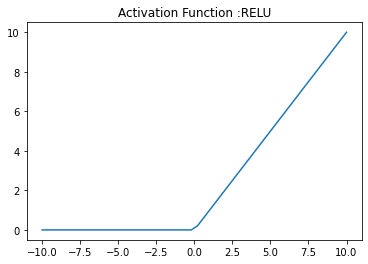

The "sigmoid" activation function looks like this:

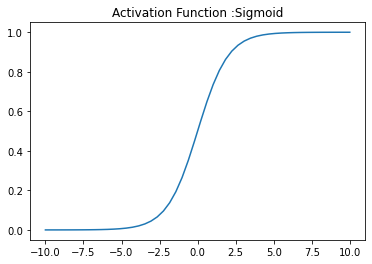

### Compiling the model

In [8]:
# compiling the model
fnn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# loss = the loss function. The loss function measures how good our prediction is. 
# The prediction can be any number between 0 and 1, for instance, 0.4
# The smaller the loss value the more accurate the prediction.
# loss = "binary_crossentropy", reads: "binary cross entropy" is commonly used for binary predictions. 

# optimizer = "adam" is widely used for different kinds of problems.
# adam stands for adaptive moment estimation



##### Cross entropy loss function is also called log loss function.
##### It is usually used together with the activation function, "sigmoid". 
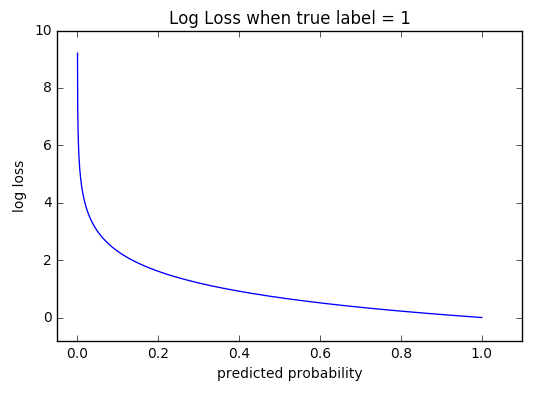

### Fitting the model

In [9]:
# Fitting the keras model using fit()
# epochs specigy the number of iterations or number of times the model will be trained
# batch_size is the number of instances used in each epoch
fit_db = fnn.fit(x_train_db, y_train_db, epochs=250, batch_size=12)
fit_db


Epoch 1/250
45/45 [==============================] - 1s 1ms/step - loss: 0.6918 - accuracy: 0.6592
Epoch 2/250
45/45 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.6629
Epoch 3/250
45/45 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.6685
Epoch 4/250
45/45 [==============================] - 0s 1ms/step - loss: 0.6208 - accuracy: 0.6723
Epoch 5/250
45/45 [==============================] - 0s 1ms/step - loss: 0.5951 - accuracy: 0.6760
Epoch 6/250
45/45 [==============================] - 0s 1ms/step - loss: 0.5704 - accuracy: 0.6853
Epoch 7/250
45/45 [==============================] - 0s 1ms/step - loss: 0.5502 - accuracy: 0.6927
Epoch 8/250
45/45 [==============================] - 0s 1ms/step - loss: 0.5347 - accuracy: 0.7076
Epoch 9/250
45/45 [==============================] - 0s 1ms/step - loss: 0.5206 - accuracy: 0.7188
Epoch 10/250
45/45 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.7393
Epoch 11/

45/45 [==============================] - 0s 1ms/step - loss: 0.3954 - accuracy: 0.8119
Epoch 84/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.8156
Epoch 85/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.8101
Epoch 86/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8119
Epoch 87/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3924 - accuracy: 0.8194
Epoch 88/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8119
Epoch 89/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.8063
Epoch 90/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3894 - accuracy: 0.8138
Epoch 91/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3892 - accuracy: 0.8119
Epoch 92/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3877 - accuracy: 0.8194
Epoch 93/250


45/45 [==============================] - 0s 1ms/step - loss: 0.3473 - accuracy: 0.8380
Epoch 165/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3462 - accuracy: 0.8380
Epoch 166/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.8417
Epoch 167/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3454 - accuracy: 0.8454
Epoch 168/250
45/45 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.8417
Epoch 169/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3448 - accuracy: 0.8417
Epoch 170/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3440 - accuracy: 0.8324
Epoch 171/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3436 - accuracy: 0.8454
Epoch 172/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8436
Epoch 173/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.8454
Epoc

45/45 [==============================] - 0s 1ms/step - loss: 0.3137 - accuracy: 0.8603
Epoch 246/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3139 - accuracy: 0.8585
Epoch 247/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8547
Epoch 248/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3129 - accuracy: 0.8603
Epoch 249/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3135 - accuracy: 0.8529
Epoch 250/250
45/45 [==============================] - 0s 1ms/step - loss: 0.3144 - accuracy: 0.8529


In [13]:
predictions = fnn.predict(x_test_db)
rounded2 = [round(x[0],2) for x in predictions]
for x in rounded2:
    print(x)

# Is the prediction closest to the actual data? 

rounded = [round(x[0]) for x in predictions]
for i in range(len(predictions)):
    print(rounded[i] == y_test_db.iloc[i,])


8/8 [==============================] - 0s 2ms/step
0.0
0.34
0.29
0.9
0.7
0.03
0.41
0.05
0.22
0.68
0.55
0.02
0.9
0.25
0.66
0.36
0.98
0.9
0.64
0.72
0.03
0.0
0.01
0.07
0.06
0.05
0.87
0.98
0.77
0.02
0.45
0.0
0.77
0.93
0.62
0.0
0.3
0.5
0.97
0.02
0.09
0.01
0.87
0.0
0.88
0.78
0.0
0.83
0.28
0.77
0.0
0.58
0.8
0.0
0.0
0.02
0.01
0.22
0.0
0.15
0.99
0.51
0.09
0.25
0.14
0.08
0.17
0.0
0.29
0.29
0.52
0.05
0.76
0.4
0.03
0.37
0.0
0.55
0.96
0.99
0.02
0.73
0.02
0.0
0.0
0.6
0.29
0.28
0.3
0.83
0.01
0.51
0.87
0.82
0.03
0.0
0.0
0.54
0.09
0.27
0.1
0.47
0.0
0.0
0.52
0.66
0.21
0.01
1.0
0.29
0.0
0.64
0.0
0.34
0.03
0.03
0.67
0.15
0.04
0.0
0.35
0.9
0.15
0.11
0.0
0.34
0.82
0.1
0.04
0.11
0.3
0.46
0.59
0.01
0.05
0.28
0.6
0.01
0.01
0.09
0.0
0.96
0.09
0.87
0.6
0.99
0.59
0.07
0.49
0.84
0.16
0.08
0.13
0.0
0.53
0.17
0.13
0.15
0.54
0.51
0.03
0.34
0.02
0.42
0.0
0.02
0.54
0.48
0.0
0.01
0.19
0.21
0.0
0.4
0.0
0.26
0.02
0.13
0.35
0.43
0.33
0.57
0.22
0.38
0.91
0.39
0.99
0.89
0.03
0.86
0.02
0.06
0.83
0.06
0.37
0.0
0.89
0.38
0.93
0

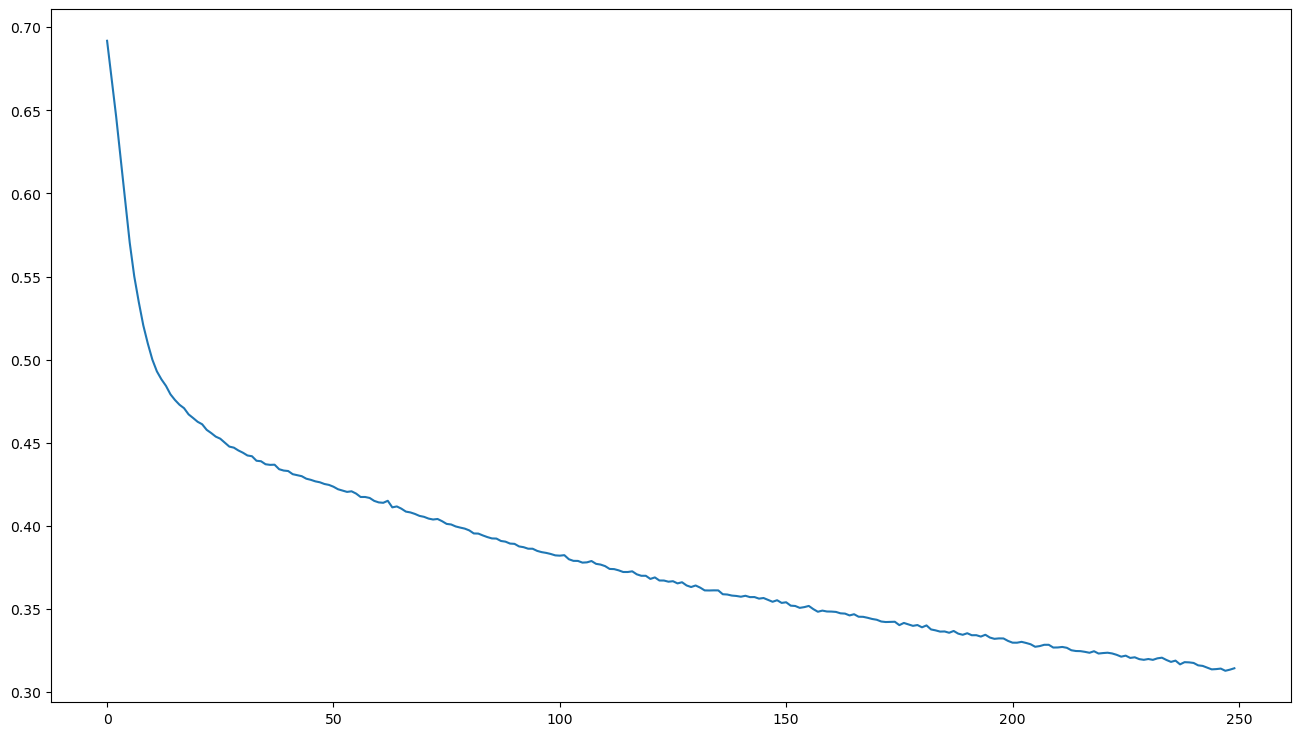

In [11]:
fig = plt.figure(figsize=(16, 9))
plt.plot(fit_db.history["loss"], label="loss")
# plt.plot(fit_db.history["accuracy"], label="accuracy")
plt.show()

#### To learn more, here is a good resource. https://ml-cheatsheet.readthedocs.io/en/latest/nn_concepts.html